# Notes
Source of dataset: https://www.kaggle.com/datasets/swadeshi/stress-detection-dataset

This dataset consists of 3000 rows, representing daily data for 100 participants over a period of 30 days. The data captures various psychological, behavioral, and physiological attributes for each participant. Below is a breakdown of the columns:

participant_id: Unique identifier for each participant. Data type: Integer
Range: 1 to 100 (as there are 100 participants)

day:The day of observation for each participant. Data type: Integer

Range: 1 to 30 (each participant is observed over 30 days)

PSS_score:Perceived Stress Scale score, measuring stress levels. Data type: Integer 
Range: 10 to 40

Openness:Measure of openness to experience, a personality trait. Data type: Float
Range: 1.0 to 5.0

Conscientiousness: Measure of conscientiousness, a personality trait. Data type: Float
Range: 1.0 to 5.0

Extraversion: Measure of extraversion, a personality trait. Data type: Float
Range: 1.0 to 5.0

Agreeableness: Measure of agreeableness, a personality trait. Data type: Float
Range: 1.0 to 5.0

Neuroticism: Measure of neuroticism, a personality trait. Data type: Float
Range: 1.0 to 5.0

sleep_time: The time (in hours) the participant went to sleep. Data type: Float
Range: 5.0 to 9.0 hours

wake_time: The time (in hours) the participant woke up. Data type: Float
Range: 5.0 to 9.0 hours

sleep_duration: The duration (in hours) the participant slept. Data type: Float
Range: 6.0 to 9.0 hours

PSQI_score: Pittsburgh Sleep Quality Index (PSQI) score, measuring sleep quality. Data type: Integer
Range: 1 to 5

call_duration: Total duration of phone calls for the day (in minutes). Data type: Float
Range: 0 to 60 minutes

num_calls: Number of phone calls made during the day. Data type: Integer
Range: 0 to 20 calls

num_sms: Number of SMS messages sent during the day. Data type: Integer
Range: 0 to 50 messages

screen_on_time: Total screen-on time for the day (in hours). Data type: Float
Range: 1.0 to 12.0 hours

skin_conductance:Measure of skin conductance, indicating arousal or stress response.Data type: Float
Range: 0.5 to 5.0 µS (microsiemens)

accelerometer: Accelerometer data representing physical movement.Data type: Float
Range: 0.1 to 2.5 g (g-force)

mobility_radius: The radius of mobility for the participant (in kilometers).Data type: Float
Range: 0.1 to 1.5 km

mobility_distance: Total distance moved during the day (in kilometers).Data type: Float

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('stress_detection.csv')
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [4]:
#Split the dataset into training and testing sets
X = df.drop('PSS_score', axis = 1)
y = df.loc[:, 'PSS_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)

# Decision Tree

In [9]:
reg = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes=15)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=15)

[Text(0.27941176470588236, 0.95, 'x[11] <= 58.509\nsquared_error = 74.129\nsamples = 2400\nvalue = 24.756'),
 Text(0.22058823529411764, 0.85, 'x[2] <= 1.011\nsquared_error = 74.253\nsamples = 2334\nvalue = 24.658'),
 Text(0.16176470588235295, 0.75, 'squared_error = 7.76\nsamples = 5\nvalue = 35.8'),
 Text(0.27941176470588236, 0.75, 'x[15] <= 0.66\nsquared_error = 74.129\nsamples = 2329\nvalue = 24.634'),
 Text(0.11764705882352941, 0.65, 'x[16] <= 1.81\nsquared_error = 66.413\nsamples = 90\nvalue = 27.178'),
 Text(0.058823529411764705, 0.55, 'squared_error = 53.381\nsamples = 67\nvalue = 28.851'),
 Text(0.17647058823529413, 0.55, 'squared_error = 72.473\nsamples = 23\nvalue = 22.304'),
 Text(0.4411764705882353, 0.65, 'x[18] <= 1.714\nsquared_error = 74.169\nsamples = 2239\nvalue = 24.532'),
 Text(0.29411764705882354, 0.55, 'x[9] <= 6.74\nsquared_error = 71.884\nsamples = 571\nvalue = 25.426'),
 Text(0.23529411764705882, 0.45, 'x[9] <= 6.129\nsquared_error = 64.135\nsamples = 145\nvalue 

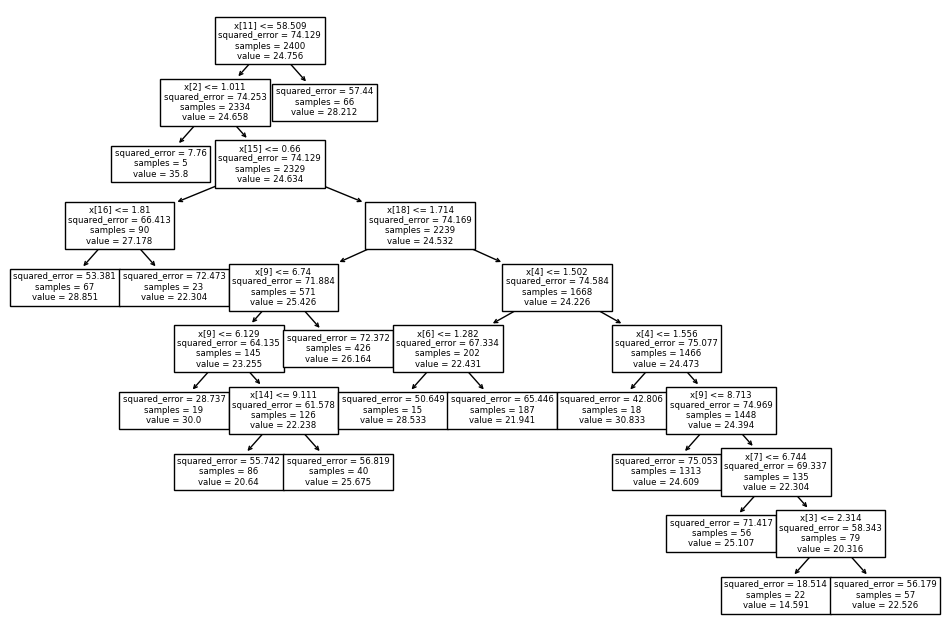

In [10]:
plt.figure(figsize = (12,8))
plot_tree(reg)

# Random Forest

In [12]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [21]:
rfr.predict(X_test)

array([29.4, 24.2, 24.5, 24. , 25.5, 23.4, 22.6, 22.4, 20.7, 21.8, 25.2,
       27.3, 28.5, 21.7, 22.6, 27.2, 28.2, 28.5, 25.1, 18.8, 23.6, 19.6,
       26.6, 23.1, 22.3, 26.1, 22.4, 26.4, 22.1, 25.7, 25.5, 24.9, 25.4,
       23.6, 24.9, 24.2, 24.6, 23.5, 26.5, 33.3, 23.8, 23. , 25.7, 28.3,
       22.8, 29. , 19.3, 23.4, 35.1, 25.6, 23.9, 27.5, 27.7, 27.4, 23.3,
       26.5, 25. , 27.3, 25.2, 24.7, 26.7, 25.8, 28.7, 24.9, 26.1, 22.4,
       30.5, 24.4, 27.3, 25.3, 28. , 20.3, 22.1, 20.5, 23.2, 29.6, 21.8,
       24.7, 20.1, 26.4, 26.3, 26.3, 27.9, 27.5, 22.9, 26. , 27.1, 22.6,
       23.8, 20.5, 26.6, 22.8, 23.5, 20.7, 24.1, 26.2, 25.7, 27.4, 25.8,
       24.6, 24.9, 19.6, 28.7, 25.9, 27.3, 25.1, 20.2, 21.6, 26.1, 19. ,
       26.8, 24.8, 22.2, 26.4, 24. , 24.2, 22.2, 18.8, 31.2, 26.7, 30.1,
       24.2, 23.8, 21. , 24.2, 22.1, 24.4, 25.8, 23.6, 26.2, 24.9, 25.8,
       24.9, 23.1, 20.4, 23.6, 20.7, 22.4, 23.4, 29.3, 24.9, 25.7, 25.2,
       23.7, 20.4, 26.2, 25.5, 22. , 20. , 22.2, 25

In [19]:
#View feature importance
feature_importance = rfr.feature_importances_
importances_df = pd.DataFrame({'Feature': df.drop('PSS_score', axis=1).columns, 'Importance': feature_importance})
sorted_importances_df = importances_df.sort_values('Importance', ascending = False)
print(sorted_importances_df)

              Feature  Importance
14     screen_on_time    0.065026
9      sleep_duration    0.063547
8           wake_time    0.062542
3   Conscientiousness    0.061178
15   skin_conductance    0.061106
5       Agreeableness    0.060117
11      call_duration    0.060095
6         Neuroticism    0.057524
4        Extraversion    0.057440
16      accelerometer    0.056520
7          sleep_time    0.056085
18  mobility_distance    0.055419
17    mobility_radius    0.053237
2            Openness    0.050849
0      participant_id    0.047054
1                 day    0.043060
13            num_sms    0.040935
12          num_calls    0.034135
10         PSQI_score    0.014130


# AdaBoostRegeressor

In [22]:
weak_learner = DecisionTreeRegressor(max_depth = 1)
clr_ada = AdaBoostRegressor(estimator = weak_learner, random_state = 2)
clr_ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), random_state=2)

# Scores

In [26]:
# Random Forest Regressor
y_pred_rfr = rfr.predict(X_test)
accuracy_rfr = r2_score(y_test, y_pred_rfr)
rfr_score = rfr.score(X_test, y_test)
print("Random Forest: ", rfr_score, accuracy_rfr)

# Decision Tree Regressor
reg_score = reg.score(X_test, y_test)
print("Decision Tree: ", reg_score)

# AdaBoost Regressor
clr_score = clr_ada.score(X_test, y_test)
print("AdaBoost: ", clr_score)

#The model predictions are worse than guessing regularly

Random Forest:  -0.07666772155050827 -0.07666772155050827
Decision Tree:  -0.07334164703624291
AdaBoost:  -0.0037081030856225272
